# Irvine Diabetes Dataset

In [1]:
# !pip install ipympl

In [23]:
import pandas as pd
import numpy as np
import ipympl as mpl # to show and resize (image) plots
import matplotlib.pyplot as plt

In [3]:
BASE = '/Users/brinkley97/Documents/development/'
PROJECT_PATH = 'blood_glucose_prediction/'
DATASET_PATH = 'datasets/irvine_diabetes_dataset/'
specific_file = BASE + PROJECT_PATH + DATASET_PATH + 'data-01'

In [4]:
# %matplotlib widget

In [5]:
data_01_file = pd.read_csv(specific_file, sep='\t', header=None)

# Prepare the Data

`2.1. Rename Columns`

In [6]:
data_01_file

,0,1,2,3
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
938,09-02-1991,17:30,33,7
939,09-02-1991,23:00,48,155
940,09-03-1991,7:20,58,110
941,09-03-1991,7:20,33,9


In [7]:
column_names = ['Date', 'Time', 'Code', 'Value']
data_01_file.columns = column_names

In [8]:
data_01_file

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
938,09-02-1991,17:30,33,7
939,09-02-1991,23:00,48,155
940,09-03-1991,7:20,58,110
941,09-03-1991,7:20,33,9


`2.2. Combine Date and Time columns`

In [9]:
# method 1:

# data_01_file['DateTime'] = data_01_file['Date'] + ' ' + data_01_file['Time']
# data_01_file

In [10]:
# method 2:

data_01_file['DateTimeIndex'] = pd.to_datetime(data_01_file['Date'] + data_01_file['Time'], format='%m-%d-%Y%H:%M')
data_01_file

,Date,Time,Code,Value,DateTimeIndex
0,04-21-1991,9:09,58,100,1991-04-21 09:09:00
1,04-21-1991,9:09,33,9,1991-04-21 09:09:00
2,04-21-1991,9:09,34,13,1991-04-21 09:09:00
3,04-21-1991,17:08,62,119,1991-04-21 17:08:00
4,04-21-1991,17:08,33,7,1991-04-21 17:08:00
...,...,...,...,...,...
938,09-02-1991,17:30,33,7,1991-09-02 17:30:00
939,09-02-1991,23:00,48,155,1991-09-02 23:00:00
940,09-03-1991,7:20,58,110,1991-09-03 07:20:00
941,09-03-1991,7:20,33,9,1991-09-03 07:20:00


`2.3. Convert the date and time column(s) to a pandas DateTime column and set it as the index of the DataFrame. Learn more at [2][3].`

In [11]:
data_01_file.set_index(['DateTimeIndex'], inplace=True)
data_01_file

,Date,Time,Code,Value
DateTimeIndex,,,,
1991-04-21 09:09:00,04-21-1991,9:09,58,100
1991-04-21 09:09:00,04-21-1991,9:09,33,9
1991-04-21 09:09:00,04-21-1991,9:09,34,13
1991-04-21 17:08:00,04-21-1991,17:08,62,119
1991-04-21 17:08:00,04-21-1991,17:08,33,7
...,...,...,...,...
1991-09-02 17:30:00,09-02-1991,17:30,33,7
1991-09-02 23:00:00,09-02-1991,23:00,48,155
1991-09-03 07:20:00,09-03-1991,7:20,58,110


In [12]:
data_01_file.drop(columns=['Date', 'Time'], inplace=True)

In [13]:
data_01_file.head(20)

,Code,Value
DateTimeIndex,,
1991-04-21 09:09:00,58,100
1991-04-21 09:09:00,33,9
1991-04-21 09:09:00,34,13
1991-04-21 17:08:00,62,119
1991-04-21 17:08:00,33,7
1991-04-21 22:51:00,48,123
1991-04-22 07:35:00,58,216
1991-04-22 07:35:00,33,10
1991-04-22 07:35:00,34,13


`2.4. Get subset of data - pre and post for breakfast, lunch, and supper`

In [14]:
pre_breakfast_58 = (data_01_file['Code'].values == 58)
# pre_breakfast_58 
post_breakfast_59 = (data_01_file['Code'].values == 59)
# post_breakfast_59

pre_lunch_60 = (data_01_file['Code'].values == 60)
post_lunch_61 = (data_01_file['Code'].values == 61)

pre_supper_62 = (data_01_file['Code'].values == 62)
post_supper_63 = (data_01_file['Code'].values == 63)

pre_post_meals_df = data_01_file[pre_breakfast_58 | post_breakfast_59 | pre_lunch_60 | post_lunch_61 | pre_supper_62 | post_supper_63]
pre_post_meals_df

,Code,Value
DateTimeIndex,,
1991-04-21 09:09:00,58,100
1991-04-21 17:08:00,62,119
1991-04-22 07:35:00,58,216
1991-04-22 16:56:00,62,211
1991-04-23 07:25:00,58,257
...,...,...
1991-09-01 09:02:00,58,183
1991-09-01 17:41:00,62,249
1991-09-02 08:51:00,58,168


In [15]:
# check where there are NaNs, +- Infinity
pre_post_meals_df.isin([np.nan, np.inf, -np.inf]).sum()

Code     0
Value    0
dtype: int64

## Collect basic statistics and plot

In [16]:
data_01_mean = pre_post_meals_df['Value'].mean()
print("mean: ", data_01_mean)
data_01_median = pre_post_meals_df['Value'].median()
print("median: ", data_01_median)
data_01_mode = pre_post_meals_df['Value'].mode()
print("mode: ", data_01_mode)

mean:  161.4295532646048
median:  154.0
mode:  0      75
1      79
2     103
3     113
4     129
5     133
6     183
7     201
8     207
9     246
10    251
Name: Value, dtype: int64


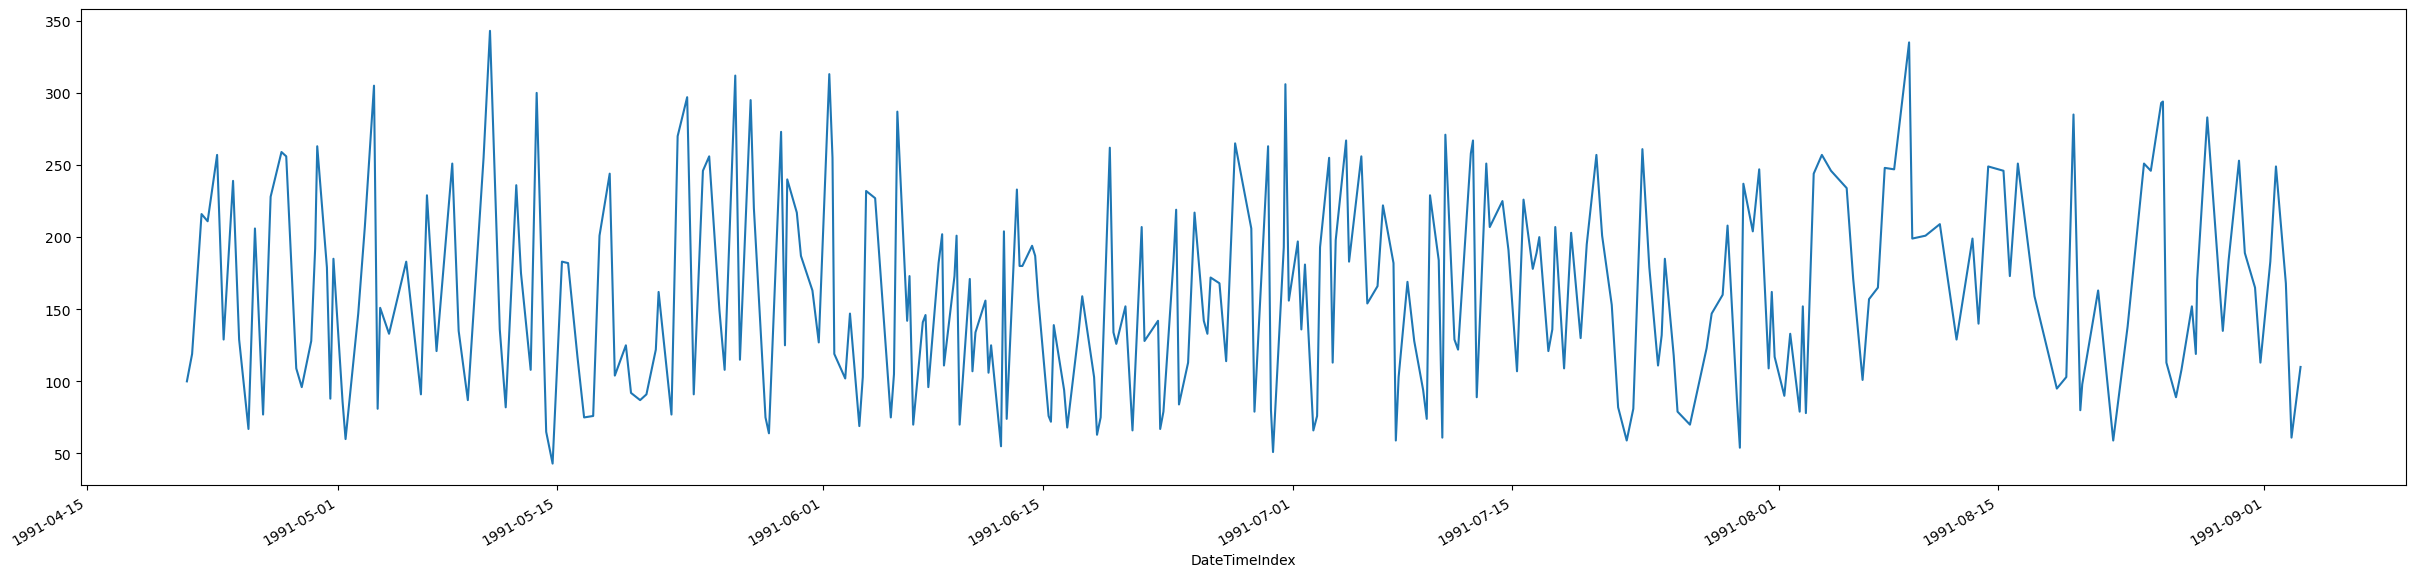

In [30]:
pre_post_meals_df['Value'].plot(x=pre_post_meals_df.index, y='Value', figsize=(30, 7), use_index=True)
plt.show()

# References
1. DATASET: [Diabetes Data Set](https://archive.ics.uci.edu/ml/datasets/diabetes) via UCI
2. SOFTWARE: [DateTime Notes with Code from CH 12 Time Series Analysis from Pandas Cookbook](https://github.com/Brinkley97/tutorial-python_libraries/blob/main/pandas/dateTime.ipynb) by Detravious
3. SOFTWARE: [Exploring Dates and Times - Python vs Pandas Notes with Code](https://github.com/Brinkley97/tutorial-python_libraries/blob/main/pandas/dateTime2.ipynb) by Detravious